# Data preparation for machine learning

By: Jacobo Fernandez-Vargas and Luca Citi

Based on the [scikit-learn](http://scikit-learn.org/stable/tutorial/basic/tutorial.html) and [pandas](https://pandas.pydata.org/docs/getting_started/index.html) documentation

## Loading data with Pandas

Pandas is a powerful library used in data analysis. We are not going to explore all its options but only focus on those functionalities that allow us to read data that contains non-numeric values such as text or dates. Pandas can also load data from excel files using the library 'xlrd'. Pandas supports reading and writing other complex data types such as sql, json, html and many more.
When reading CSV files, Pandas tries to infer the type from the values in each column. We can force Pandas to treat a column as containing dates and even specify that we want to treat dates as 'dayfirst', i.e. DD/MM/YYYY (the way used in several countries, including the UK) rather than MM/DD/YYYY (like in the USA).
If we have all numeric values in a CSV format we can also use Numpy directly to read the table but we will not have access to Pandas functionalities.

In [375]:
import pandas as pd

In [376]:
import sklearn.base

data = pd.read_csv('example1.csv', parse_dates=['Date'], dayfirst=True)
data

,Date,Time,Size,Colour,Cost,Label
0,2020-10-16,11.0,Small,Blue,109.521068,1
1,2020-10-16,13.0,Small,Red,112.141170,1
2,2020-10-16,17.0,Medium,Green,112.004677,1
3,2020-10-17,9.0,Large,Green,15.112922,0
4,2020-10-17,11.0,Large,Green,105.663642,1
5,2020-10-17,17.0,Medium,Green,5.158097,0
6,2020-10-18,9.0,Small,Blue,107.947930,1
7,2020-10-18,NaN,Large,Red,8.320838,0
8,2020-10-18,13.0,Large,Red,113.424684,1
9,2020-10-18,15.0,Small,Blue,103.223563,1


Just like `ndarray` is the fundamental brick of the numpy library, the dataframe is the fundamental brick of the pandas library.
A dataframe is a table where each column is a variable (or series as they are called in Pandas) and each row is a sample. We can access each series using the name of the variable, either using the index notation (`df['v']`) or as field of the object (`df.v`). The latter notation can only be used when the field name is a valid field name (e.g., column '3a' can only be accessed as `df['3a']`).

The method `head` shows only the first 5 entries of the table.

In [377]:
print(data['Date'].head())
print(data.Date.head())

0   2020-10-16
1   2020-10-16
2   2020-10-16
3   2020-10-17
4   2020-10-17
Name: Date, dtype: datetime64[ns]
0   2020-10-16
1   2020-10-16
2   2020-10-16
3   2020-10-17
4   2020-10-17
Name: Date, dtype: datetime64[ns]


To select rows, we ca use either a conditional format or a more traditional indexing.
For example let's select the rows for which the color is blue.

In [378]:
data[data["Colour"] == 'Blue']

,Date,Time,Size,Colour,Cost,Label
0,2020-10-16,11.0,Small,Blue,109.521068,1
6,2020-10-18,9.0,Small,Blue,107.947930,1
9,2020-10-18,15.0,Small,Blue,103.223563,1
11,2020-10-19,9.0,Medium,Blue,105.216665,1
13,2020-10-19,13.0,Large,Blue,15.599248,0
16,2020-10-20,NaN,Large,Blue,113.658567,1
18,2020-10-23,11.0,Medium,Blue,3.643787,0
21,2020-10-25,NaN,Large,Blue,10.699388,0
24,2020-10-26,13.0,Small,Blue,1.228235,0
27,2020-10-28,13.0,Large,Blue,12.414377,0


Now let's select the first five rows.

In [379]:
data.iloc[:5,:]

,Date,Time,Size,Colour,Cost,Label
0,2020-10-16,11.0,Small,Blue,109.521068,1
1,2020-10-16,13.0,Small,Red,112.141170,1
2,2020-10-16,17.0,Medium,Green,112.004677,1
3,2020-10-17,9.0,Large,Green,15.112922,0
4,2020-10-17,11.0,Large,Green,105.663642,1


Pandas is a really powerful tool but in the interest iof time we are not going to explain it further. However you can visit these [tutorials](https://pandas.pydata.org/docs/getting_started/index.html) to learn more about it.

## Prepare the data

Now that we have the data in the dataframe we will process it to transform all its values into numerical ones.
There are mainly two types of data that may be necessary to transform: dates and categorical values.
We can see what type of data we have in our dataframe:

In [380]:
data.dtypes

Date      datetime64[ns]
Time             float64
Size              object
Colour            object
Cost             float64
Label              int64
dtype: object

(Note that the methods we see in this section replace non-numerical values with floating point numbers _in place_, so if you run them again you will get an error since the column does not contain the expected type anymore.)

### Dates

A standard way to transform dates is to change them into the time passed since a specific reference time point. This is as simple as:


* Likely to normalize dates before using them.
    * Likely to either do it based on unix epoch time, or unix time from a specific date/time relevant to the task at hand.

In [381]:
time0 = pd.Timestamp('2020-08-01 00:00:00')
data['Date'] = (data['Date'] - time0).values.astype(float)
data.head()

,Date,Time,Size,Colour,Cost,Label
0,6.566400e+15,11.0,Small,Blue,109.521068,1
1,6.566400e+15,13.0,Small,Red,112.141170,1
2,6.566400e+15,17.0,Medium,Green,112.004677,1
3,6.652800e+15,9.0,Large,Green,15.112922,0
4,6.652800e+15,11.0,Large,Green,105.663642,1


### Categorical values

Categorical values are non numerical values that may have or not an ordinal relationship.

Ithey have an ordinal relationship (for example: low, mid, high or small, big),
a simple approach is to transform directly to numerical value respecting the order
(although this will impose an arbitrary distance between the values).


Pandas allows use to do this using a dictionary and the method `replace`.

In [382]:
cleanup = {"Size": {"Small":0, "Medium":1, "Large":2}}
data.replace(cleanup, inplace=True)
data.head()

,Date,Time,Size,Colour,Cost,Label
0,6.566400e+15,11.0,0,Blue,109.521068,1
1,6.566400e+15,13.0,0,Red,112.141170,1
2,6.566400e+15,17.0,1,Green,112.004677,1
3,6.652800e+15,9.0,2,Green,15.112922,0
4,6.652800e+15,11.0,2,Green,105.663642,1


This method should not be used with categorical values with no ordinal relationship,
for example the colour. Is red bigger than blue?


If we treat them as having ordinal relationship some algorithms may be unaffected by this.
However, most algorithms will suffer (in terms of accuracy) when using this practice.

The 'proper' way to deal with such values is to create a number of variables equal
to the the number of different values that the categorical value may take,
and then set all to 0 except for one that will set to 1.

This is called 'one-hot' encoding. In our case it would be something like:

Red -> \[0, 0, 1\]

Blue -> \[1, 0, 0\]

Green -> \[0, 1, 0\]

Fortunately, pandas makes this easy with the method `get_dummies`.

In [383]:
data = pd.get_dummies(data, columns= ['Colour'])
data.head()

,Date,Time,Size,Cost,Label,Colour_Blue,Colour_Green,Colour_Red
0,6.566400e+15,11.0,0,109.521068,1,1,0,0
1,6.566400e+15,13.0,0,112.141170,1,0,0,1
2,6.566400e+15,17.0,1,112.004677,1,0,1,0
3,6.652800e+15,9.0,2,15.112922,0,0,1,0
4,6.652800e+15,11.0,2,105.663642,1,0,1,0


We can now confirm that all columns have been converted to numeric types.

In [384]:
data.dtypes

Date            float64
Time            float64
Size              int64
Cost            float64
Label             int64
Colour_Blue       uint8
Colour_Green      uint8
Colour_Red        uint8
dtype: object

Finally we want to transfer our data to two numpy arrays, one containing the variables (features)
and another the labels (ground truth).

In [385]:
import numpy as np
x = data.loc[:, data.columns != 'Label'].to_numpy()
y = data.loc[:, 'Label'].to_numpy()
print(x.shape, y.shape)

(33, 7) (33,)


We do this because Numpy ndarrays can only hold numeric values.



## Data Visualization

It is good practice to visualize the data to see if there is something obviously wrong. The matplotlib library includes a number of useful visualisation tools to help us. Getting familiar with this library (or a similar one) and its functions is a first step become a data scientist. Among the many functions make sure you become familiar with scatter, plot, and bar!

### False predictors

In some ocassions we may have a variable that is a false predictor, meaning that it's been introduced in the data by mistake and contains information about the label. Let's imagine that we have a dataset of clients of a bank, and we want to predict if a client will buy an add-on insurance. One of the variables could be how much the client pays to the bank for its services. If this price includes the cost of the insurance, this will result in a variable that may have a strong prediction power but won't work during the deployment because we will detect only the clients that already have an insurance.

In our data there is one false predictor, could you point which one looking at the plots?

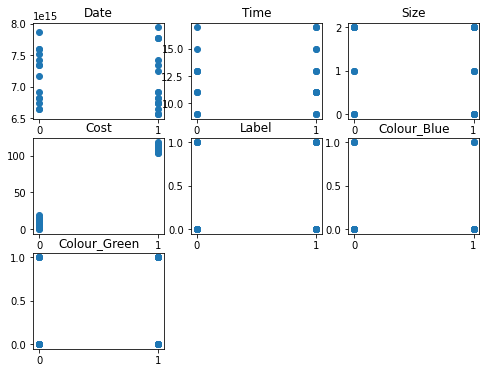

In [386]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
for i in range(x.shape[1]):
    plt.subplot(3, 3, i+1)
    plt.scatter(y,x[:,i])
    plt.xticks([0, 1])
    plt.title(data.columns[i])

## Cross-validation
Learning the parameters of a prediction function and testing it on the same data is
a methodological mistake: a model may memorise the training data perfectly and have a
perfect score but would fail to predict anything useful on yet-unseen data.

This situation is called overfitting.
To avoid it, when performing a (supervised) machine learning task,
it is common practice to hold out part of the available data as a test set,
which we will store in the variables `X_test` and `y_test`.


Conceptually, we need to simulate the future situation,
where we have trained our system with some data and,
then, we apply it to some unseen data.

However, to get better estimates of the accuracy of our model on new data,
it is good practice to repeat the procedure after rotating which part of the data
are used for train and which for testing.

One such method is called *cross-validation* and helps reduce the variability in
estimating the accuracy on new data.

* The mentality I need to have
    * We have this dataset and a machine learning algorithm for the future.
        * How can I evaluate the actual performance of my algorithm on any future data?
* K-fold cross validation
    * Split entire training data (everything but final validation) into N segments. (5 segments?)
        * Then, for each segment
            * Train the model using the other segments, and then use that segment as the test data that time.
        * Once we have N trained models
            * Could just use the single best model from that population
                * Not a good approach, that one model might not
            * Could try to turn the models into something that returns the majority opinion of those models
                * But might need to test that aggregate model again
            * Make a new model that is just the average of all the produced models (weighted by performance)
                * But there's no real way to assess the performance of that model,
                * generally means we're out of data.
* Might be a bit more tricky for a neural network - those generally take a long time to train.

Scikit-learn is a library for machine learning (more on this in the next lab).
It has a collection of classes which can be used to generate lists of train/test
indices for popular cross-validation strategies.

They expose a `split` method which accepts the input dataset to be split and
yields the train/test set indices for each iteration of the chosen cross-validation strategy.

In [387]:
from sklearn.model_selection import KFold, cross_val_score

k_fold = KFold(n_splits=5)
for train_indices, test_indices in k_fold.split(x):
    print('Train: %s | test: %s' % (train_indices, test_indices))

Train: [ 7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30
 31 32] | test: [0 1 2 3 4 5 6]
Train: [ 0  1  2  3  4  5  6 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30
 31 32] | test: [ 7  8  9 10 11 12 13]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 21 22 23 24 25 26 27 28 29 30
 31 32] | test: [14 15 16 17 18 19 20]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 27 28 29
 30 31 32] | test: [21 22 23 24 25 26]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26] | test: [27 28 29 30 31 32]


Graphically, we can represent the cross validation loop as follows
(where 'O' represents a training sample and '•' a test one):

In [388]:
for train_indices, test_indices in k_fold.split(x):
    for i in range(len(x)):
        print('O' if i in train_indices else '•', end='')
    print('')



•••••••OOOOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOO•••••••OOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOO•••••••OOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOO••••••OOOOOO
OOOOOOOOOOOOOOOOOOOOOOOOOOO••••••


Cross-validation is the cornerstone of supervised machine learning design.
All the data-dependent manipulations (not only classification, but also pre-processing)
must happen inside Cross-Validation loops when analysing the performance of a system.

Multiple cross-validation loops can be nested when performing hyper-parameter fitting.
We will explore this in the next lab. See this [link](https://stats.stackexchange.com/q/292179)
for a graphical representation of nested cross-validation.

The `Kfold` class in sklearn, has another parameter, shuffle.

* shuffles data before splitting it
    * Samples within the splits not shuffled.

Read the documentation about it and explore what changes when its value is True.

## Pre-processing

### Missing data

It is common to have missing values in some of the variables.
We can see this counting the number of NaN (Not a Number) in our dataset:

In [389]:
np.sum(np.isnan(x), 0)

array([0, 4, 0, 0, 0, 0, 0])

Here we can see that the second variable in our dataset has some values that are missing.

#### Default value

The fastest and easiest way to deal with missing data, is to assign a default value (ex. 0).
This is possible if we know something about the variable and which may be a good default value,
but sometimes we don't.

#### Data-driven value

A better option, is to use a value that is derived from the data, such as the mean,
median or other statistical value.

However, as mentioned before, this should happen **inside the cross-validation**
(i.e. any value used for imputation must be computed using **only** the training data).

* Why only use the training data?
    * Because, IRL, we can't predict the future outputs.
    * The test data is the future outputs (at least whilst testing) - not allowed to cheat.

Here we calculate the mean of the second variable in our dataset for different folds.

We use the function `nanmean` from numpy to calculate the mean of an array containing NaN values.

In [390]:
k_fold = KFold(n_splits=5)
for train_indices, test_indices in k_fold.split(x):
    print(np.nanmean(x[train_indices, 1]))

12.272727272727273
12.130434782608695
12.304347826086957
12.416666666666666
12.416666666666666


As you can see the value of that mean differs for each fold.
This is why is important to do it inside the fold validation loop.

### Data transformation

Many algorithms work better when the data are inside a specific range,
or when all the data have similar ranges.

This is not the case for all the algorithms
(some work equally well with un-normalised or normalised data).

#### Data-clipping

One option is to just set predefined maximum and minimum values.

For this, we can use the `clip` method from numpy.

#### Scaling and Normalization

In the same way, as with the missing data,
a better practice is to perform this procedure in a data-driven manner.

For this, sklearn provides several options in its 'preprocessing' package.

As before, this normalisation step should be included **inside** the cross validation loop as well.

### Any preparation for the data I'm using must take place in the cross-validation loop.

In [391]:
from sklearn.preprocessing import StandardScaler
k_fold = KFold(n_splits=5)
x_or = x.copy() # We make a copy of our data to avoid overwriting
for train_indices, test_indices in k_fold.split(x):
    mean = np.nanmean(x_or[train_indices, 1])
    x[np.isnan(x_or[:,1]), 1] = mean # We substitute the missing values for the mean
    ss = StandardScaler()
    ss.fit(x[train_indices, :])
    x_train = ss.transform(x[train_indices, :])
    x_test = ss.transform(x[test_indices, :])


In [392]:
print(x)


[[6.56640000e+15 1.10000000e+01 0.00000000e+00 1.09521068e+02
  1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.56640000e+15 1.30000000e+01 0.00000000e+00 1.12141170e+02
  0.00000000e+00 0.00000000e+00 1.00000000e+00]
 [6.56640000e+15 1.70000000e+01 1.00000000e+00 1.12004677e+02
  0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [6.65280000e+15 9.00000000e+00 2.00000000e+00 1.51129219e+01
  0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [6.65280000e+15 1.10000000e+01 2.00000000e+00 1.05663642e+02
  0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [6.65280000e+15 1.70000000e+01 1.00000000e+00 5.15809691e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [6.73920000e+15 9.00000000e+00 0.00000000e+00 1.07947930e+02
  1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.73920000e+15 1.24166667e+01 2.00000000e+00 8.32083783e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00]
 [6.73920000e+15 1.30000000e+01 2.00000000e+00 1.13424684e+02
  0.00000000e+00 0.00000000e+00 1.00000000e+00]
 [6.739200

In this example we see something that is common in many methods in the sklearn package,
the division between `fit` and `transform`.

These allow to the creation of pipelines which help streamline the modeling of different methods.

## Exercise

Using what you have learned in this notebook, prepare the data from the file 'exercise1.csv'.

Note that in this case you need to manipulate the 'Label' column as well.


In [393]:
data = pd.read_csv('exercise1.csv', parse_dates=[['Date', 'Hour']], dayfirst=True)
data


,Date_Hour,ID_e,E,N,Sex,Cell,Label
0,2018-06-05 12:27:00,e1f1,5.583066,1.175189,f,e1,o
1,2018-06-21 10:20:00,e1f1,5.325020,0.962680,f,e1,o
2,2018-06-21 14:25:00,e1f1,3.412439,0.947501,f,e1,o
3,2018-06-21 12:30:00,e1f1,3.761561,2.010046,f,e1,o
4,2018-06-15 12:06:00,e1f1,NaN,1.144831,f,e1,o
...,...,...,...,...,...,...,...
7184,2018-05-25 15:40:00,e9m9,1.103858,NaN,m,e9,y
7185,2018-05-25 17:21:00,e9m9,3.699470,NaN,m,e9,y
7186,2018-05-24 16:26:00,e9m9,1.766447,NaN,m,e9,y
7187,2018-05-23 12:30:00,e9m9,0.497900,1.169597,m,e9,y


In [394]:
def combine(fold, cols, sep="_", new_name = None):
    if new_name == None:
        new_name = sep.join(cols)
    merged = fold[cols].apply(
        lambda row: sep.join(row.values.astype(str)), axis=1
    )
    for c in cols:
        fold.drop(c, axis=1, inplace=True)
    fold[new_name] = merged
    return fold


In [395]:
def normalize_datetimes_in_fold(fold, datetime_head = "Date", use_min_value=True):
    """
    Normalizes the datetimes within the fold
    (relative to the earliest item in the fold).
    Manipulates the fold itself.
    :param fold:
    :param date_head:
    :param use_min_value: if false, uses unix epoch instead to normalize
    :return:
    """
    if use_min_value:
        time0 = fold[datetime_head].min()
    else:
        time0 = pd.Timestamp(0)
    fold[datetime_head] = (fold[datetime_head] - time0).values.astype(float)
    return fold



In [396]:
def onehot(fold, category):
    return pd.get_dummies(fold, columns= [category])

data = onehot(data, "Sex")
print(data.head())

data = onehot(data, "Label")
print(data.head())

data = onehot(data, "Cell")
print(data.head())

data = onehot(data, "ID_e")
print(data.head())

            Date_Hour  ID_e         E         N Cell Label  Sex_f  Sex_m
0 2018-06-05 12:27:00  e1f1  5.583066  1.175189   e1     o      1      0
1 2018-06-21 10:20:00  e1f1  5.325020  0.962680   e1     o      1      0
2 2018-06-21 14:25:00  e1f1  3.412439  0.947501   e1     o      1      0
3 2018-06-21 12:30:00  e1f1  3.761561  2.010046   e1     o      1      0
4 2018-06-15 12:06:00  e1f1       NaN  1.144831   e1     o      1      0
            Date_Hour  ID_e         E         N Cell  Sex_f  Sex_m  Label_o  \
0 2018-06-05 12:27:00  e1f1  5.583066  1.175189   e1      1      0        1   
1 2018-06-21 10:20:00  e1f1  5.325020  0.962680   e1      1      0        1   
2 2018-06-21 14:25:00  e1f1  3.412439  0.947501   e1      1      0        1   
3 2018-06-21 12:30:00  e1f1  3.761561  2.010046   e1      1      0        1   
4 2018-06-15 12:06:00  e1f1       NaN  1.144831   e1      1      0        1   

   Label_w  Label_y  
0        0        0  
1        0        0  
2        0        0  

In [397]:
def fill_in_the_nans(train_fold, test_fold, original_ds, full_ds):
    mean = np.nanmean(train_fold)
    original_ds[np.isnan(full_ds["E"]), 1] = mean # We substitute the missing values for the mean
    ss = StandardScaler()
    train_fold = ss.fit_transform(train_fold)
    test_fold = ss.transform(test_fold)
    return train_fold, test_fold

In [398]:

k_fold = KFold(n_splits=5)
d_folded = data.copy()
for train_indices, test_indices in k_fold.split(data):

    # We obtain test_indices fold
    this_fold = d_folded.iloc[train_indices]
    #this_fold.head()

    # normalize the datetimes in the fold
    normalize_datetimes_in_fold(this_fold, datetime_head="Date_Hour")
    #print(this_fold.head())

    # filling in the blanks for E and N
    #this_fold['E'].fillna(value=d_folded['E'].mean(), inplace=True)
    #this_fold['N'].fillna(value=d_folded['N'].mean(), inplace=True)

    #print(this_fold.head())





C:\Users\rl18730\AppData\Local\Temp/ipykernel_12896/3464926426.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fold[datetime_head] = (fold[datetime_head] - time0).values.astype(float)


### Extra 1

The columns 'Date' and 'Hour' could be merged, into a single value
(even directly upon reading the CSV file).

Explore how to do it either in Pandas or Numpy.

### Extra 2

This file indicates the position (East, North) where some lizards were seen.
Each lizard has an ID (ID_e) and has been spotted several times.

To infer the position for those samples where there is no available data,
instead of using the mean (or any other imputation method) based on the whole training set,
try to calculate the mean (or other statistical value) for that specific lizard based on the training data.

Note that, depending on how you divide the data,
there could be unknown data in the test set for a lizard that was not included in the training data.

Think of a possible way to deal with this issue.